In [1]:
from pathlib import Path
import cv2
import numpy as np
from tensorly.decomposition import robust_pca
import matplotlib.pyplot as plt

In [84]:
home=Path('D:\PIV Data\Exports Raw Images 1 Channel')
NewSpreaderDir=home/'VectorStatistics FR 2lpm New Spreader'

In [129]:
imgs=NewSpreaderDir.glob('*.tif')

In [131]:
%%memit
fname=next(imgs).as_posix()
_,(img,_)=cv2.imreadmulti(fname)
nx,ny=img.shape

#Initialize the Array with First Image
maty=img.ravel().shape[0]
data_mat=np.zeros((1,maty))

#iterate thru imgs generator of img filepaths
for img in imgs:
    fname=img.as_posix()
    #print(fname)
    _,(temp,_)=cv2.imreadmulti(fname)
    data_mat=np.vstack((temp.ravel(),data_mat))

D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000034.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000035.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000036.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000037.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000038.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000039.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000040.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000041.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000042.tif
D

D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000108.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000109.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000110.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000111.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000112.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000113.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000114.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000115.tif
D:/PIV Data/Exports Raw Images 1 Channel/VectorStatistics FR 2lpm New Spreader/HiSense NEO.6863s9ve.000116.tif
D

In [132]:
n_imgs,_ = data_mat.shape
data_tensor=data_mat.reshape(n_imgs,nx,ny)
del data_mat

In [133]:
data_tensor -= data_tensor.mean()

<IPython.core.display.Javascript object>


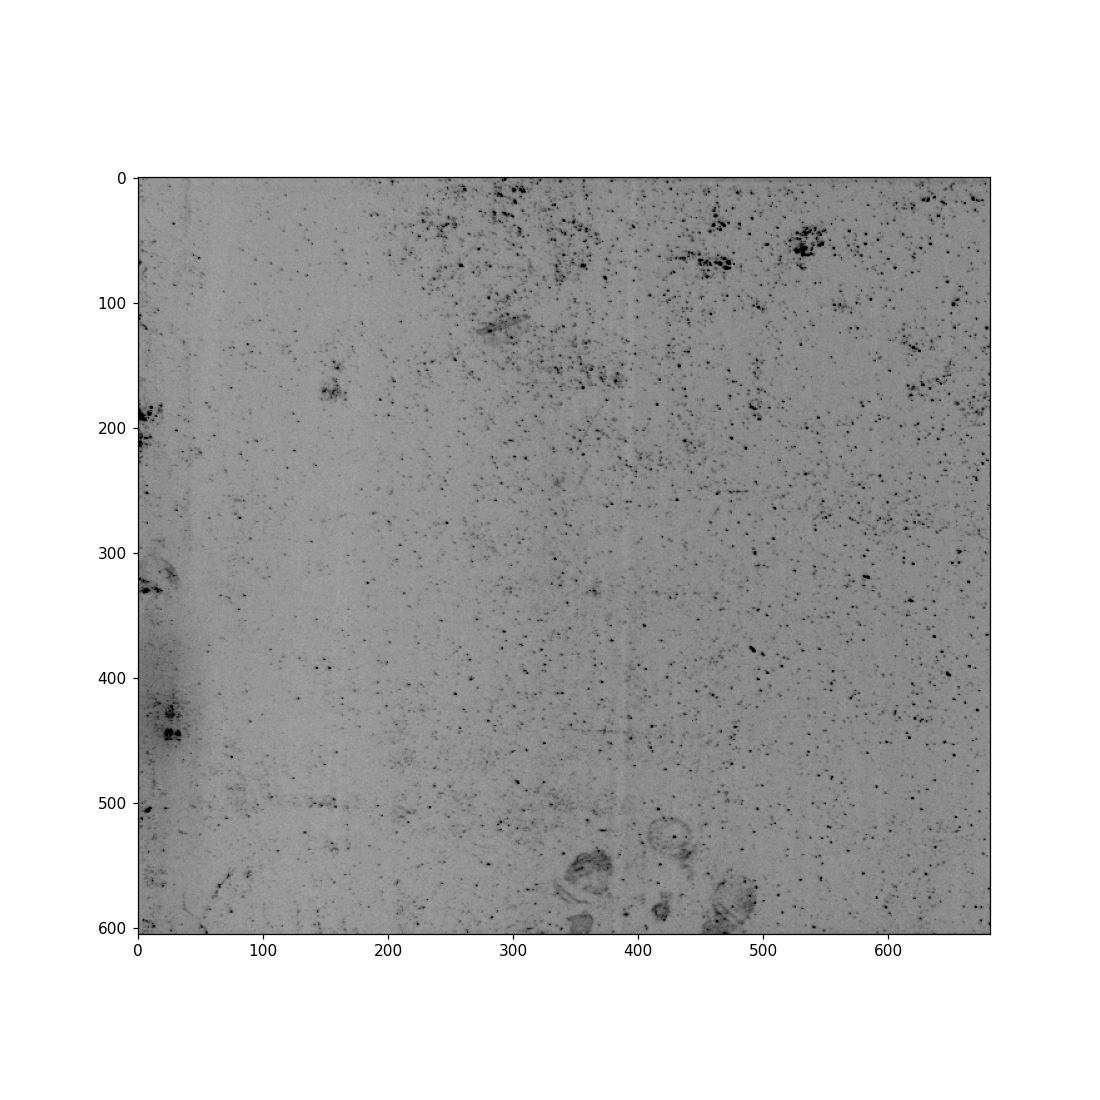

In [134]:
%matplotlib notebook
fig,ax=plt.subplots(figsize=(10,10))
ax.imshow(data_tensor[0,230:-720:2,36:1400:2],cmap='Greys',vmin=-20,vmax=20)

<IPython.core.display.Javascript object>


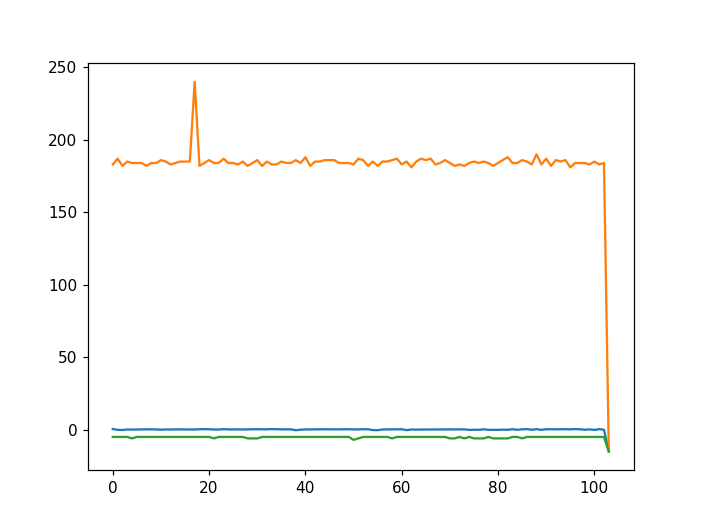

In [141]:
plt.plot(np.mean(data_tensor,axis=(1,2)))
plt.plot(np.max(data_tensor,axis=(1,2)))
plt.plot(np.min(data_tensor,axis=(1,2)))

In [142]:
%memit low_rank_part, sparse_part = robust_pca(data_tensor[:100,230:-720:2,36:1400:2], reg_E=0.05, learning_rate=1.2, n_iter_max=50,verbose=2)


peak memory: 9009.56 MiB, increment: 4392.43 MiB


In [144]:
newImgDir=home/'VectorStatistics FR 2lpm New Spreader'/'FilteredReg05'
for i,x in enumerate(sparse_part):
    temp=x-x.min()
    temp*=(2**16-1)/temp.max()
    temp=temp.astype(np.uint16)
    fname='RPCA_FilteredImg_'+str(i)+'.tif'
    cv2.imwrite(img=temp,filename=(newImgDir/fname).as_posix())

In [82]:
newImgDir=home/'VectorStatistics FR 2lpm New Spreader'/'FilteredBg'
for i,x in enumerate(low_rank_part):
    temp=x-x.min()
    temp*=(2**16-1)/temp.max()
    temp=temp.astype(np.uint16)
    fname='RPCA_FilteredImg_'+str(i)+'.tif'
    cv2.imwrite(img=temp,filename=(newImgDir/fname).as_posix())

<IPython.core.display.Javascript object>


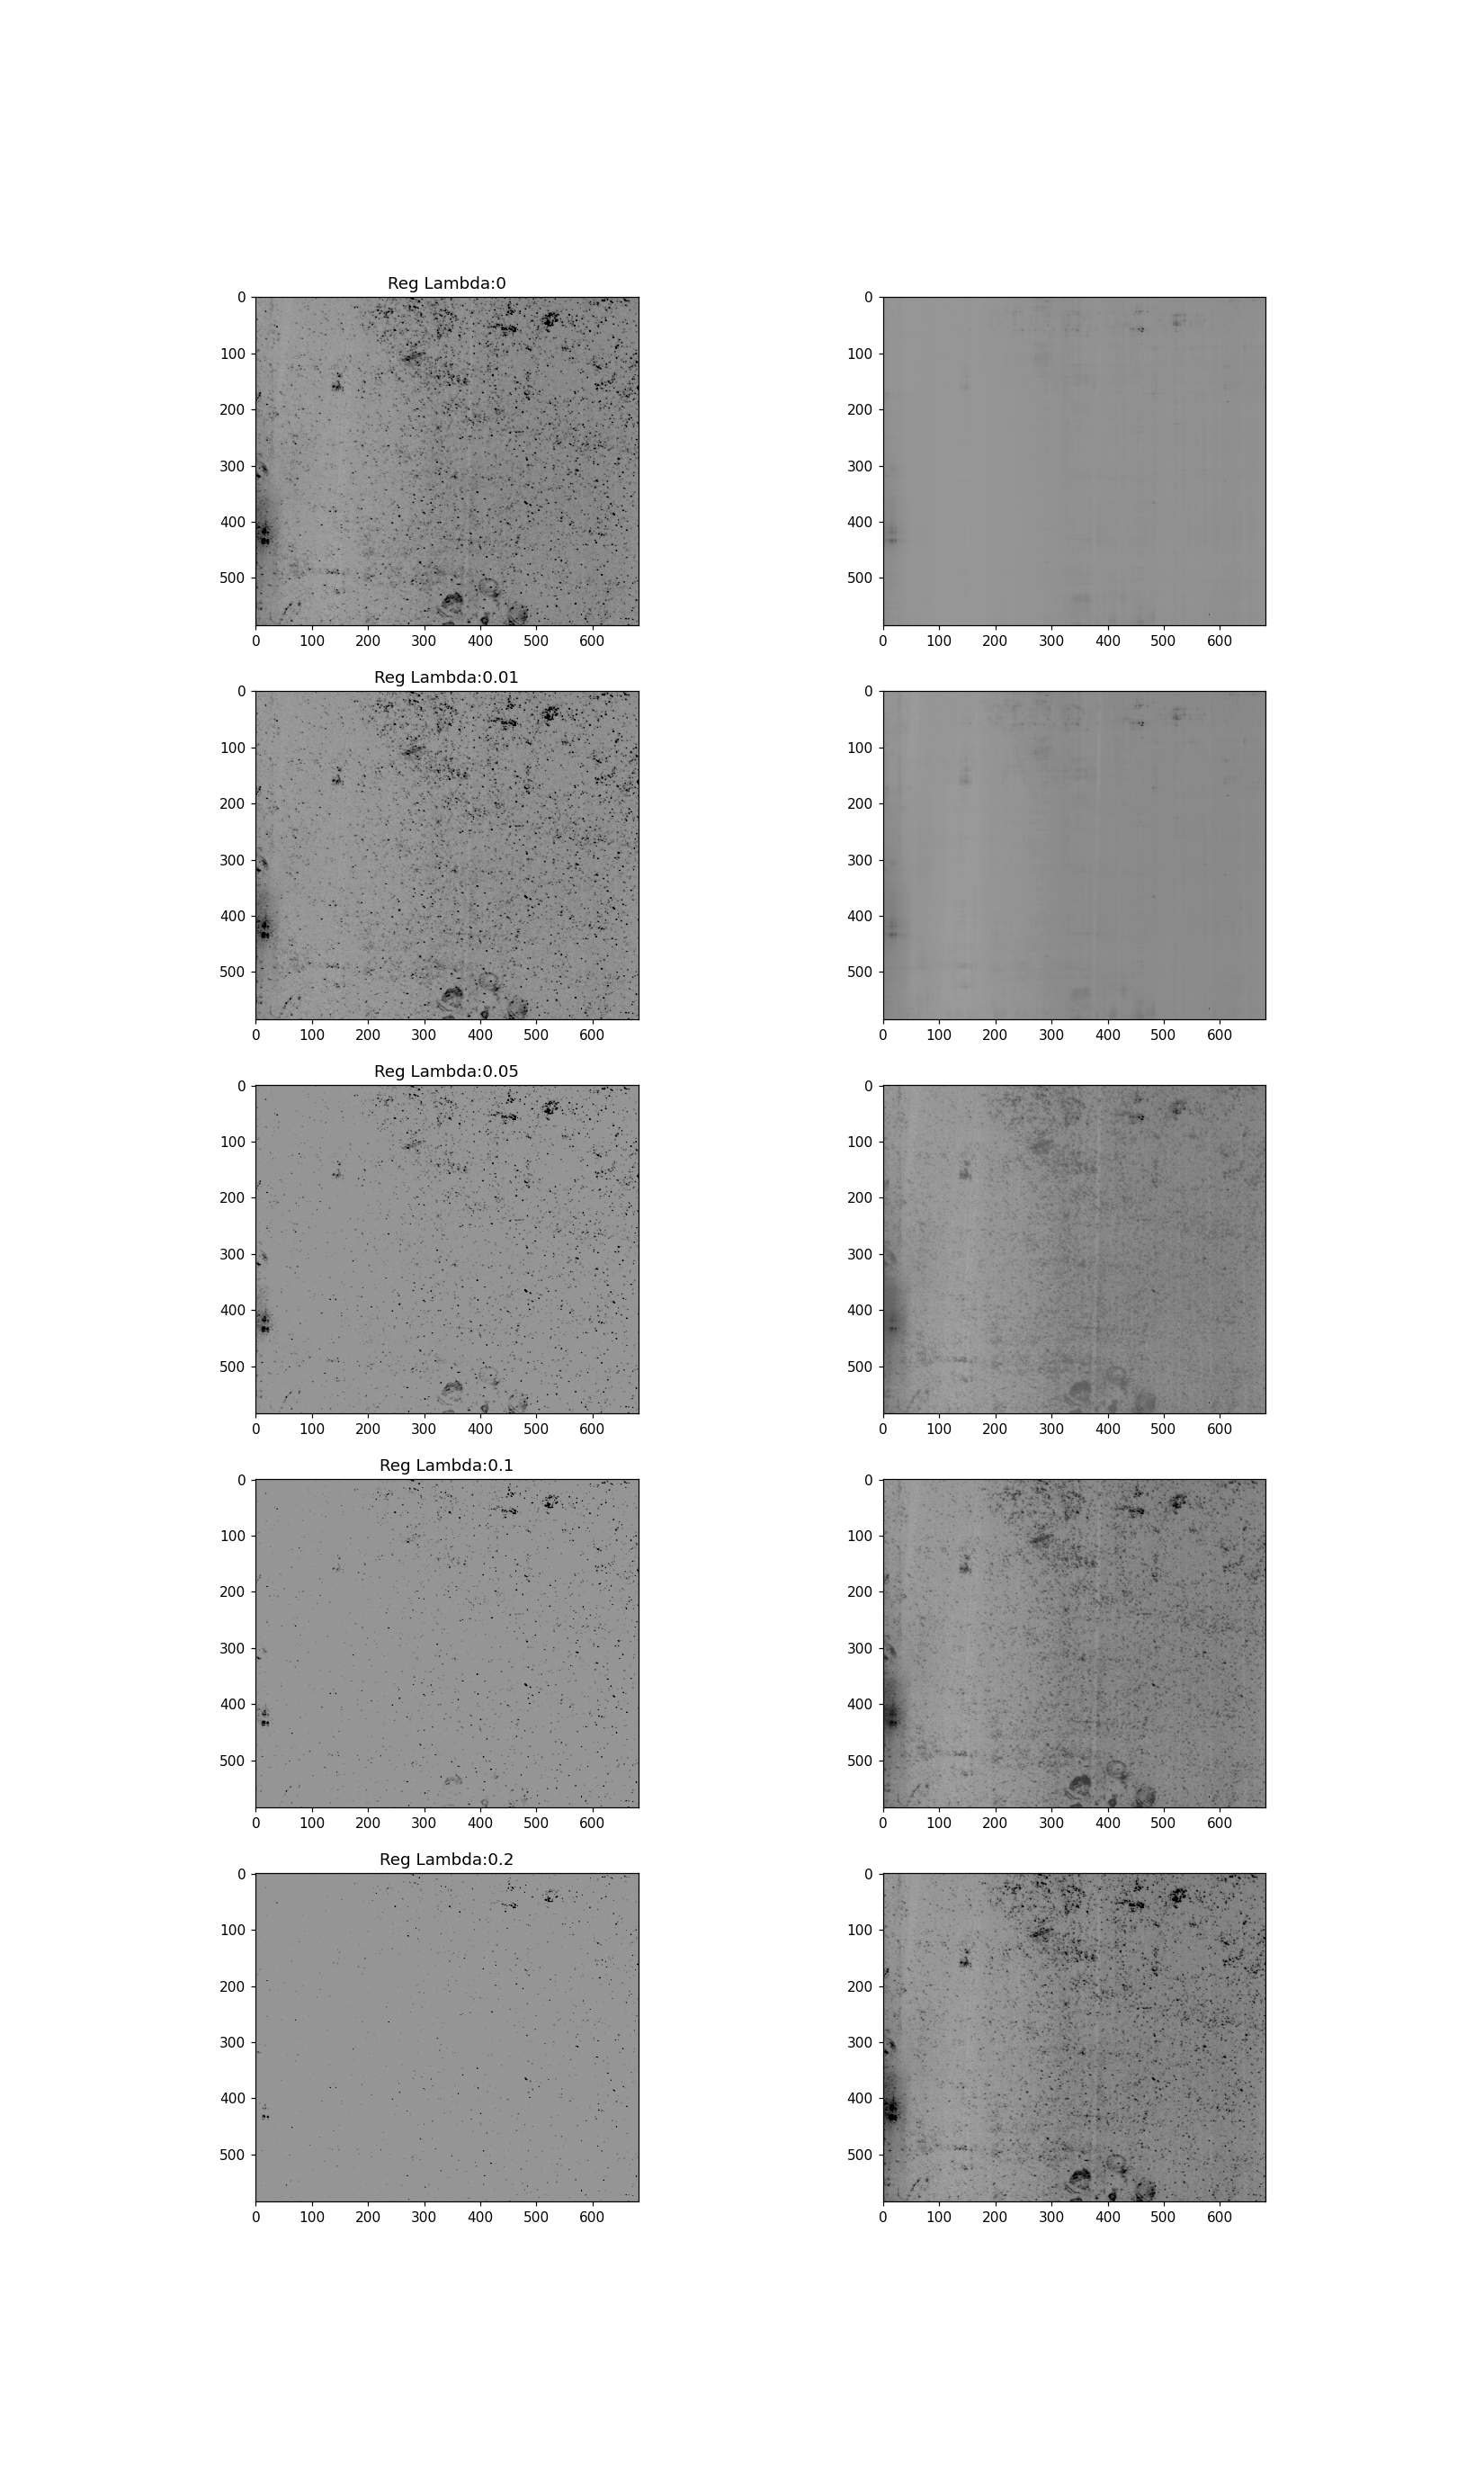

0
0.01
0.05
0.1
0.2


In [31]:
fig,ax=plt.subplots(5,2,figsize=(15,25))
for i,reg in enumerate([0,0.01,0.05,0.1,0.2]):
    print(str(reg))
    low_rank_part, sparse_part = robust_pca(data_tensor[:20,230:-720:2,36:1400:2], reg_E=reg, learning_rate=1.2, n_iter_max=20,verbose=2)
    ax[i][0].imshow(sparse_part[0,:,:],cmap='Greys',vmin=-3000,vmax=3000)
    ax[i][1].imshow(low_rank_part[0,:,:],cmap='Greys',vmin=-3000,vmax=3000)
    ax[i][0].set_title(f'Reg Lambda:{str(reg)}')